# Práctica 1.1 - NNs (2024-2025) - Aprendizaje Profundo (Grado en IA)

|Integrantes|Correo electrónico|
|-----------|------------------|
|Hugo Fole Abellás|hugo.fole.abellas@udc.es|
|José Romero Conde|j.rconde@udc.es|


En esta práctica realizaremos un entrenamiento de una red neuronal. Dicha red será entrenada con el dataset **CIFAR-10**, el cual contiene 60.000 imágenes a color de tamaño 32×32 de las que 50.000 se usarán para el entrenamiento de la red y 10.000 para testearla. 

Las imágenes pertenecen a las 10 posibles categorı́as (6.000 imágenes por categorı́a).

Inicialmente, importaremos las librerías a utilizar.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib as plt

A continuación, importaremos el dataset que será usado para entrenar la red que crearemos más adelante. Cabe recalcar que este dataset ya viene divido en dos lotes,como ya dijimos antes. Un lote de entrenamiento que contiene 50.000 instacias y otro de validación de 10.000.

In [2]:
from keras.datasets import cifar10

(x_train, y_train) , (x_test, y_test) = cifar10.load_data()

## NORMALIZACIÓN DE LOS DATOS
Para poder trabajar de manera correcta con este dataset, deberemos seguir ciertos procesos de normalización de datos, de manera que, o bien optimicemos su tiempo de ejecución o bien nos permita trabajar con el dataset. Estos procesos son :

    1. Realizar One-hot encoding en los targets.
    2. Normalizar los valores de las imágenes a float, ya que vienen en valores de 0 a 255.
    3. Aplanar cada imagen para que sean vectores y no matrices.

### 1. One-hot encoding
Como ya comentamos, haremos one-hot en los targets de nuestro dataset ya que vienen divididos en 10 tipos de salidas categóricas representadas por números. Las diferentes salidas las podemos ver en la siguiente tabla.
|Número|Categoría|
|------|---------|
|0|airplane|
|1|automobile|
|2|bird|
|3|cat|
|4|deer|
|5|dog|
|6|frog|
|7|horse|
|8|ship|
|9|truck|

In [3]:
type(x_train[0][0][0][0])

numpy.uint8

In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes = 10)
y_test = keras.utils.to_categorical(y_test, num_classes = 10)

#### 2.Normalización datos
Como ya dijimos, en este apartado realizaremos la parte de normalización de datos de **uint8** con valores entre [0-255] a **float64**, para que pasen a estar en el rango de valores [0,1] ya que esto nos permite trabajar con redes de neuronas, agiliza el entrenamiento de dichas redes y aumenta la precisión de estas.

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

#### 3. Aplanar las imágenes

In [6]:
x_train = keras.layers.Flatten()(x_train)
x_test = keras.layers.Flatten()(x_test)

In [7]:
x_train# vemos que apalana (hape=(3072,))

<tf.Tensor: shape=(50000, 3072), dtype=float32, numpy=
array([[0.23137255, 0.24313726, 0.24705882, ..., 0.48235294, 0.36078432,
        0.28235295],
       [0.6039216 , 0.69411767, 0.73333335, ..., 0.56078434, 0.52156866,
        0.5647059 ],
       [1.        , 1.        , 1.        , ..., 0.3137255 , 0.3372549 ,
        0.32941177],
       ...,
       [0.13725491, 0.69803923, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.7411765 , 0.827451  , 0.9411765 , ..., 0.7647059 , 0.74509805,
        0.67058825],
       [0.8980392 , 0.8980392 , 0.9372549 , ..., 0.6392157 , 0.6392157 ,
        0.6313726 ]], dtype=float32)>

### CREACIÓN RED NEURONAL Y ENTRENAMIENTO

Crearemos una red de neuronas artificiales densa, es decir, completamente conectada. Estudiaremos diversas composiciones y diversos hiperparámetros para saber cual sería el más óptimo para el dataset.

In [39]:
model = keras.Sequential(
    [
        keras.layers.Dense(3072, activation="relu"),
        keras.layers.Dense(2000, activation="relu"),
        keras.layers.Dense(1000, activation="relu"),
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dense(200, activation="relu"),
        keras.layers.Dense(80, activation="relu"),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(10, activation = "sigmoid"),
    ]
)
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-2),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.Accuracy()])
history = model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=100,
    validation_split = .1
)

Epoch 1/4
450/450 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.8866 - loss: 0.1021 - val_accuracy: 0.9000 - val_loss: 0.1000
Epoch 2/4
450/450 ━━━━━━━━━━━━━━━━━━━━ 29s 65ms/step - accuracy: 0.9000 - loss: 0.1000 - val_accuracy: 0.9000 - val_loss: 0.1000
Epoch 3/4
450/450 ━━━━━━━━━━━━━━━━━━━━ 28s 63ms/step - accuracy: 0.9000 - loss: 0.1000 - val_accuracy: 0.9000 - val_loss: 0.1000
Epoch 4/4
450/450 ━━━━━━━━━━━━━━━━━━━━ 28s 63ms/step - accuracy: 0.9000 - loss: 0.1000 - val_accuracy: 0.9000 - val_loss: 0.1000


In [82]:
y_gorro = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [83]:
acierto = sum([sum(y_gorro[i] == y_test[i])==10 for i in range(len(y_test))])*100/len(y_test)

In [84]:
f'accuracy de {acierto}% en test'

'accuracy de 0.0% en test'

Como ya tenemos un buen acuracy en train pero un mal acuracy en test, vamos a regularizar.

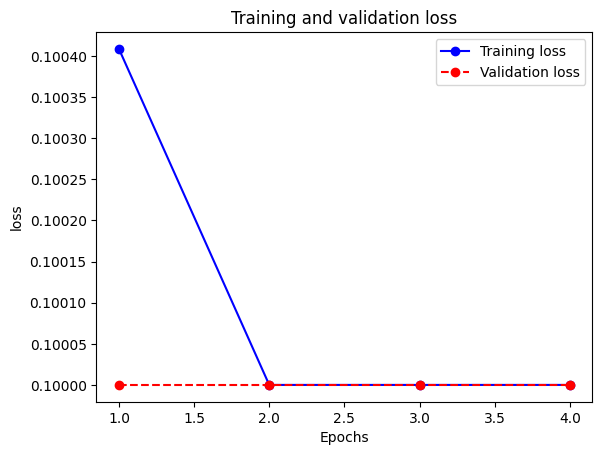

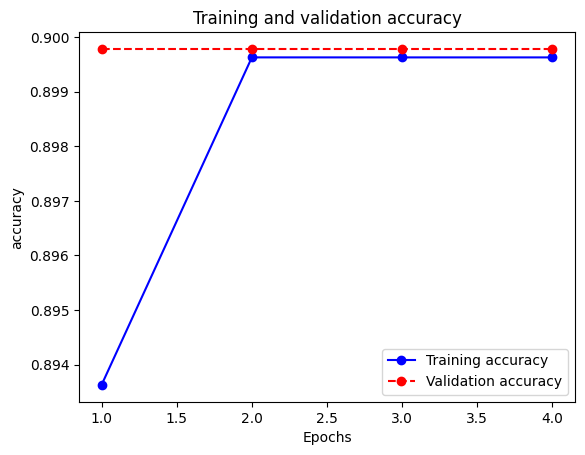

In [85]:
import matplotlib.pyplot as plt

def plot(train, validation, title):
    plt.clf()
    epochs = range(1, len(train) + 1)
    
    plt.plot(epochs, train, 'b-o', label='Training ' + title)
    plt.plot(epochs, validation, 'r--o', label='Validation '+ title) 

    plt.title('Training and validation ' + title)
    plt.xlabel('Epochs')
    plt.ylabel(title)
    plt.legend()
    plt.show()
    
plot(history.history['loss'], history.history['val_loss'], 'loss')
plot(history.history['accuracy'], history.history['val_accuracy'], 'accuracy')

### Aprender las neuronas como hiperparámetros

In [80]:
pip install keras_tuner

Note: you may need to restart the kernel to use updated packages.


In [81]:
import keras_tuner
hp = keras_tuner.HyperParameters()

model = keras.Sequential(
    [
        keras.layers.Dense(3072, activation="relu"),
        keras.layers.Dense(units=hp.Int("units", min_value=1000, max_value=2500, step=25), activation="relu"),
        keras.layers.Dense(units=hp.Int("units", min_value=700, max_value=1300, step=25), activation="relu"),
        keras.layers.Dense(units=hp.Int("units", min_value=200, max_value=1000, step=20), activation="relu"),
        keras.layers.Dense(units=hp.Int("units", min_value=60, max_value=200, step=15), activation="relu"),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(units=hp.Int("units", min_value=1000, max_value=2500, step=25), activation="relu"),
        keras.layers.Dense(10, activation = "sigmoid"),
    ]
)
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-2),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.Accuracy()])
history = model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=100,
    validation_split = .1
)

Epoch 1/4
450/450 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.8646 - loss: 0.1026 - val_accuracy: 0.8998 - val_loss: 0.1000
Epoch 2/4
450/450 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.8997 - loss: 0.1000 - val_accuracy: 0.8998 - val_loss: 0.1000
Epoch 3/4
450/450 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.8996 - loss: 0.1000 - val_accuracy: 0.8998 - val_loss: 0.1000
Epoch 4/4
450/450 ━━━━━━━━━━━━━━━━━━━━ 25s 56ms/step - accuracy: 0.8996 - loss: 0.1000 - val_accuracy: 0.8998 - val_loss: 0.1000


### Regularización (parte 1)

In [66]:
from keras import regularizers

In [89]:
import keras_tuner
hp = keras_tuner.HyperParameters()

model = keras.Sequential(
    [
        keras.layers.Dense(3072, activation="relu"),
        keras.layers.Dense(units=hp.Int("units", min_value=1000, max_value=2500, step=25), activation="relu", kernel_regularizer=regularizers.l2(hp.Float("lambda", min_value=0, max_value=0.1, step=1e-4))),
        keras.layers.Dense(units=hp.Int("units", min_value=700, max_value=1300, step=25), activation="relu", kernel_regularizer=regularizers.l2(hp.Float("lambda", min_value=0, max_value=0.1, step=1e-4))),
        keras.layers.Dense(units=hp.Int("units", min_value=200, max_value=1000, step=20), activation="relu", kernel_regularizer=regularizers.l2(hp.Float("lambda", min_value=0, max_value=0.1, step=1e-4))),
        keras.layers.Dense(units=hp.Int("units", min_value=60, max_value=200, step=15), activation="relu", kernel_regularizer=regularizers.l2(hp.Float("lambda", min_value=0, max_value=0.1, step=1e-4))),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(units=hp.Int("units", min_value=1000, max_value=2500, step=25), activation="relu"),
        keras.layers.Dense(10, activation = "sigmoid"),
    ]
)
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-2),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.Accuracy()])
history = model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=100,
    validation_split = .1
)

Epoch 1/4
450/450 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.6510 - loss: 0.1023 - val_accuracy: 0.8512 - val_loss: 0.1000
Epoch 2/4
450/450 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.8497 - loss: 0.1000 - val_accuracy: 0.8512 - val_loss: 0.1000
Epoch 3/4
450/450 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.8489 - loss: 0.1000 - val_accuracy: 0.8512 - val_loss: 0.1000
Epoch 4/4
450/450 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.8488 - loss: 0.1000 - val_accuracy: 0.8512 - val_loss: 0.1000


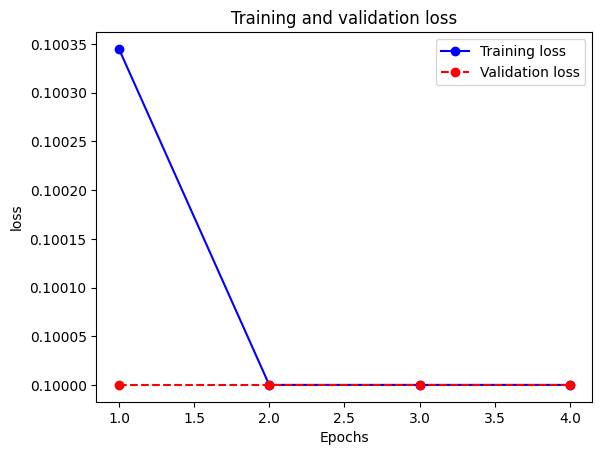

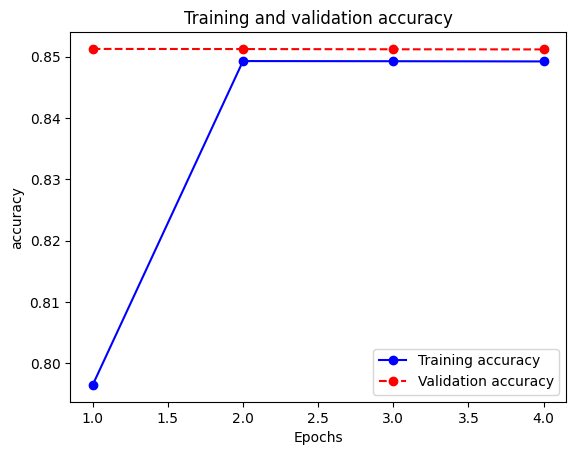

In [90]:
plot(history.history['loss'], history.history['val_loss'], 'loss')
plot(history.history['accuracy'], history.history['val_accuracy'], 'accuracy')

In [ ]:
import keras_tuner
hp = keras_tuner.HyperParameters()

model = keras.Sequential(
    [
        keras.layers.Dense(3072, activation="relu"),
        keras.layers.Dense(units=hp.Int("units", min_value=1000, max_value=2500, step=25), activation="relu", kernel_regularizer=regularizers.l2(hp.Float("lambda", min_value=0, max_value=0.1, step=1e-4))),
        keras.layers.Dense(units=hp.Int("units", min_value=700, max_value=1300, step=25), activation="relu", kernel_regularizer=regularizers.l2(hp.Float("lambda", min_value=0, max_value=0.1, step=1e-4))),
        keras.layers.Dense(units=hp.Int("units", min_value=200, max_value=1000, step=20), activation="relu", kernel_regularizer=regularizers.l2(hp.Float("lambda", min_value=0, max_value=0.1, step=1e-4))),
        keras.layers.Dense(units=hp.Int("units", min_value=60, max_value=200, step=15), activation="relu", kernel_regularizer=regularizers.l2(hp.Float("lambda", min_value=0, max_value=0.1, step=1e-4))),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(units=hp.Int("units", min_value=1000, max_value=2500, step=25), activation="relu"),
        keras.layers.Dense(10, activation = "sigmoid"),
    ]
)
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-2),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.Accuracy()])
history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=25,
    validation_split = .1
)

Epoch 1/30
1473/1800 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.5421 - loss: 0.1008